#### Пчелкина Ю.Ж., группа 6231-010402D

#### Лабораторная работа 1.
#### Вариант № 1

На наборе данных CIFAR-10 выполнить:

    1) Классификация данных методом k ближайших соседей (kNN)
    
    2) Классификация данных методом опорных векторов (SVM)

In [1]:
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

import tensorflow as tf

from sklearn.metrics import accuracy_score

from datetime import datetime
import time

#### 1. Классификация данных методом k ближайших соседей ( kNN)

1.1. Скачайте данные CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html 

- 0	самолет
- 1	автомобиль
- 2	птица
- 3	кошка
- 4	олень
- 5	собака
- 6	лягушка
- 7	лошадь
- 8	судно
- 9	грузовая машина

In [2]:
from tensorflow.keras.datasets import cifar10
cifar = cifar10.load_data()

In [3]:
cifar = tf.keras.datasets.cifar10.load_data()

Кортеж массивов NumPy : (x_train, y_train), (x_test, y_test).
- x_train : uint8 Массив NumPy данных изображения в градациях серого с фигурами (50000, 32, 32, 3), содержащий обучающие данные. Значения пикселей варьируются от 0 до 255.

- y_train : uint8 Массив меток NumPy (целые числа в диапазоне 0-9) с формой (50000, 1)для обучающих данных.

- x_test : uint8 Массив NumPy данных изображения в градациях серого с фигурами (10000, 32, 32, 3), содержащий тестовые данные. Значения пикселей варьируются от 0 до 255.

- y_test : uint8 Массив меток NumPy (целые числа в диапазоне 0-9) с формой (10000, 1)для тестовых данных.

In [31]:
# x - изображение, y - метки классов
(x_train, y_train), (x_test, y_test) = cifar

In [32]:
print ('Training data shape: ', x_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', x_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.

In [33]:
# словарь с названиями классов
dict_classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [34]:
# функция вывода первых N элементов
def plot_first_images(img, labels, idx, num):
    pred = []
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    for i in range(0, num):
        ax = plt.subplot(5, 10, 1 + i)
        ax.imshow(img[idx], cmap = 'binary')
        title = dict_classes[labels[i][0]]
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()


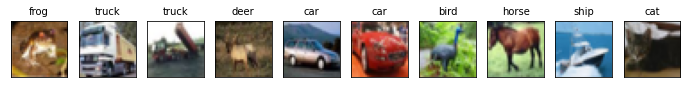

In [35]:
N = 10
plot_first_images (x_train, y_train, 0, N) 

In [36]:
# словарик. класс - номера элементов из y_train
dict_img = {}
for i in range(10):
    l = []
    for j in range(50000):
        if y_train[j][0] == i: 
            l.append(x_train[j])         
    dict_img[i] = l
   

In [37]:
# функция вывода N элементов каждого класса

def plot_images (img, classes, num):
    
    fig, axes = plt.subplots(nrows = num, ncols = 10)
    fig.set_size_inches(12, round(1*num))

    n = 1
    for ax in axes.flat:
    
        if n < 11:
            ax.set(title = classes[n-1], xticks=[], yticks=[])
            ax.imshow(img[n-1][0], cmap = 'binary')
        elif n < 101:
            ax.set(title = '', xticks=[], yticks=[])
            num = str(n-1)
            cl = int(num[1], base = 10)
            k = int(num[0], base = 10) 
            ax.imshow(img[cl][k], cmap = 'binary')
        else:
            ax.set(title = '', xticks=[], yticks=[])
            num = str(n-1)
            cl = int(num[2], base = 10)
            k = int(num[1], base = 10) 
            ax.imshow(img[cl][k], cmap = 'binary')
        
    
        n += 1
    plt.show()


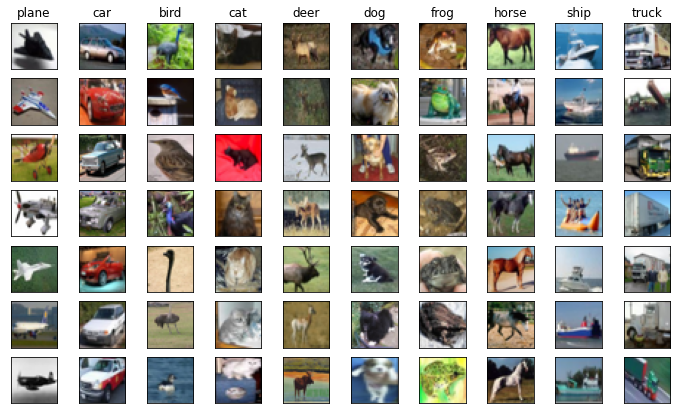

In [38]:
plot_images (dict_img, dict_classes, 7)

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив.

In [39]:
# сократим объем выборки (слишком долго все считается)
num_training = 5000
mask = list(range(num_training))
x_train_mask = x_train[mask]
y_train_new = y_train[mask]

num_test = 500
mask = list(range(num_test))
x_test_mask = x_test[mask]
y_test_new = y_test[mask]

# преобразуем изображения в одномерный массив.
x_train_new = np.reshape(x_train_mask, (x_train_mask.shape[0], -1))
x_test_new = np.reshape(x_test_mask, (x_test_mask.shape[0], -1))
print(x_train_new.shape, x_test_new.shape, y_train_new.shape, y_test_new.shape)

(5000, 3072) (500, 3072) (5000, 1) (500, 1)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке.

In [40]:
from scripts.classifiers import KNearestNeighbor

In [41]:
model_KNN = KNearestNeighbor()
model_KNN.train(x_train_new, y_train_new)

1.5 Выполните классификацию на тестовой выборке

In [42]:
# пробуем разные алгоритмы, замеряем время выполнения

start_time2 = datetime.now()

dists_two_loops = model_KNN.compute_distances_two_loops(x_test_new)

time_two_loops = datetime.now() - start_time2

print(dists_two_loops.shape)

(500, 5000)


In [43]:
start_time1 = datetime.now()

dists_one_loop = model_KNN.compute_distances_one_loop(x_test_new)

time_one_loop = datetime.now() - start_time1

print(dists_one_loop.shape)

(500, 5000)


In [44]:
start_time0 = datetime.now()

dists_no_loops = model_KNN.compute_distances_no_loops(x_test_new)

time_no_loops = datetime.now() - start_time0

print(dists_no_loops.shape)

(500, 5000)


1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки.

In [45]:
from scipy import spatial

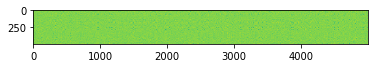

In [46]:
plt.imshow(dists_two_loops, interpolation = 'none')
plt.show()

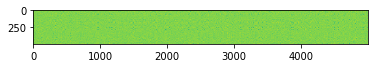

In [47]:
plt.imshow(dists_one_loop, interpolation = 'none')
plt.show()

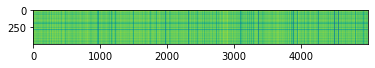

In [48]:
plt.imshow(dists_no_loops, interpolation = 'none')
plt.show()

1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.

In [50]:
# переводим в нужный формат для сравнения
y_test_new_array = []
for i in range (y_test_new.shape[0]):
    y_test_new_array.append(np.float64(y_test_new[i][0]))
y_test_new_array = np.array(y_test_new_array)

In [51]:
# two loops
y_test_pred_two_loops = model_KNN.predict_labels(dists_two_loops, k = 2)

print ('доля правильно классифицированных:', np.sum(y_test_pred_two_loops == y_test_new_array) / num_test)

доля правильно классифицированных: 0.188


In [52]:
# one loop
y_test_pred_one_loop = model_KNN.predict_labels(dists_one_loop, k = 2)

print ('доля правильно классифицированных:', np.sum(y_test_pred_one_loop == y_test_new_array) / num_test)

доля правильно классифицированных: 0.188


In [53]:
# no loops
y_test_pred_no_loops = model_KNN.predict_labels(dists_no_loops, k = 2)

print ('доля правильно классифицированных:', np.sum(y_test_pred_no_loops == y_test_new_array) / num_test)

доля правильно классифицированных: 0.114


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [54]:
neighbors = [1, 2, 3, 4, 5, 8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50]

accur = {1:0, 2:0, 3:0, 4:0, 5:0, 8:0, 10:0, 12:0, 15:0, 20:0, 25:0, 30:0, 35:0, 40:0, 45:0, 50:0}
knn_accuracy = []


for k in neighbors:
    knn_model = KNearestNeighbor()
    knn_model.train(x_train_new, y_train_new)
    dists = knn_model.compute_distances_no_loops(x_test_new)
    y_test_pred_knn = knn_model.predict_labels(dists, k = k)
    knn_accuracy.append(np.sum(y_test_pred_knn == y_test_new_array) / num_test)
    accur[k] = np.sum(y_test_pred_knn == y_test_new_array) / num_test


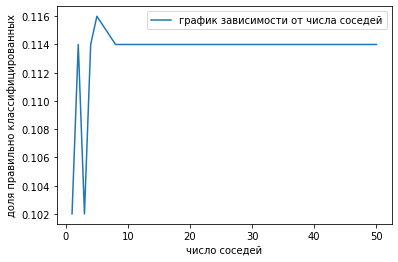

In [55]:
# график зависимости

plt.plot(neighbors, knn_accuracy, label = 'график зависимости от числа соседей')


plt.legend()
plt.xlabel('число соседей')
plt.ylabel('доля правильно классифицированных')
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.

In [56]:
best_neighbors = max(accur, key = accur.get)
print(best_neighbors)

5


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.

In [57]:
model_KNN_best = KNearestNeighbor()
model_KNN_best.train(x_train_new, y_train_new)

In [58]:
y_test_pred_no_loops = model_KNN_best.predict_labels(dists_no_loops, k = best_neighbors)


print ('доля правильно классифицированных:', np.sum(y_test_pred_no_loops == y_test_new_array) / num_test)

доля правильно классифицированных: 0.116


In [59]:
y_test_pred_one_loop = model_KNN_best.predict_labels(dists_one_loop, k = best_neighbors)


print ('доля правильно классифицированных:', np.sum(y_test_pred_one_loop == y_test_new_array) / num_test)

доля правильно классифицированных: 0.2


1.11 Сделайте выводы по результатам 1 части задания.

In [60]:
print('two_loops time:', time_two_loops)
print('one_loop time:', time_one_loop)
print('no_loops time:', time_no_loops)

two_loops time: 0:00:38.878223
one_loop time: 0:00:21.099206
no_loops time: 0:00:04.161238


При вычислении расстояния между всеми тестовыми выборками и всеми обучающими выборками использовали разные алгоримы:
    
- two_loops - использует двойной цикл (наименее эффективна в плане времени)
- one_loops - использует один цикл
- no_loops - не использует цикл

1. в плане доли правильно классифицированных нет большой разницы
 - one_loops и two_loops дает одинаковую точность
 - no_loops точность ниже


2. матрица матрица расстояний в случае "no_loops" более информативна:
    - строка ярче - тестовые данные отличаются от данных обучения. 
    - столбец ярче - данные обучения отличаются от тестовых данных.
    
    
3. наименьшее время работы дает "no_loops". Худшее время - two_loops


4. Лучший результат: one_loop, k = 5

#### 2. Классификация данных методом опорных векторов (SVM)

In [4]:
(X_train, y_train), (X_test, y_test) = cifar

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [5]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]


mask = np.random.choice(num_training, num_dev, replace = False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]



In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))


print (X_train.shape)
print (y_train.shape)
print (X_val.shape)
print (y_val.shape)
print (X_test.shape)
print (y_test.shape)

print (X_dev.shape)
print (y_dev.shape)

(49000, 3072)
(49000, 1)
(1000, 3072)
(1000, 1)
(1000, 3072)
(1000, 1)
(500, 3072)
(500, 1)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного по обучающей выборке.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


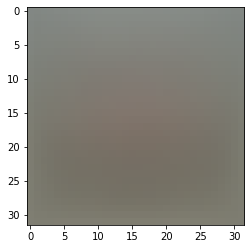

In [7]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize = (4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


In [8]:
X_train = X_train - mean_image
X_val = X_val -mean_image
X_test = X_test - mean_image
X_dev = X_dev - mean_image

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

In [9]:
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py

In [10]:
W = np.random.randn(X_dev.shape[1], 10) * 0.0001

In [12]:
from scripts.classifiers.linear_svm import svm_loss_naive

In [13]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.00001)
print('loss: %f' % (loss, ))

loss: 9.101815


2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [14]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -21.959427 analytic: 0.000000, relative error: 1.000000e+00
numerical: -3.718630 analytic: 0.000000, relative error: 1.000000e+00
numerical: 2.019846 analytic: 0.000000, relative error: 1.000000e+00
numerical: 5.186809 analytic: 0.000000, relative error: 1.000000e+00
numerical: -0.057176 analytic: 0.000000, relative error: 1.000000e+00
numerical: -43.352723 analytic: 0.000000, relative error: 1.000000e+00
numerical: 48.725726 analytic: 0.000000, relative error: 1.000000e+00
numerical: -38.520808 analytic: 0.000000, relative error: 1.000000e+00
numerical: 31.273949 analytic: 0.000000, relative error: 1.000000e+00
numerical: 9.656054 analytic: 0.000000, relative error: 1.000000e+00
numerical: -4.390990 analytic: 0.000501, relative error: 1.000000e+00
numerical: 10.695382 analytic: 0.007890, relative error: 9.985258e-01
numerical: -14.112376 analytic: 0.003159, relative error: 1.000000e+00
numerical: 10.395420 analytic: 0.001373, relative error: 9.997358e-01
numerical: -6.94572

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [15]:
from scripts.classifiers.linear_svm import svm_loss_vectorized

In [16]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))


Naive loss and gradient: computed in 0.073004s


In [17]:
tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

Vectorized loss and gradient: computed in 0.057003s


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [20]:
from scripts.classifiers.linear_classifier import LinearSVM

In [21]:
svm = LinearSVM()

In [22]:
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 409.243068
iteration 100 / 1500: loss 1011.449274
iteration 200 / 1500: loss 1018.269675
iteration 300 / 1500: loss 1679.089906
iteration 400 / 1500: loss 2277.709486
iteration 500 / 1500: loss 4004.851844
iteration 600 / 1500: loss 5567.066115
iteration 700 / 1500: loss 6151.125933
iteration 800 / 1500: loss 12345.328582
iteration 900 / 1500: loss 13729.669851
iteration 1000 / 1500: loss 5788.019328
iteration 1100 / 1500: loss 5747.229255
iteration 1200 / 1500: loss 5063.258772
iteration 1300 / 1500: loss 9675.506151
iteration 1400 / 1500: loss 6249.394102
That took 11.029631s


In [23]:
y_train_pred_svm = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred_svm), ))

y_val_pred_svm = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred_svm), ))

training accuracy: 0.100009
validation accuracy: 0.098930


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [24]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

In [25]:
results = {}
best_val = -1   
best_svm = None

In [28]:
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train, y_train, lr, reg, num_iters=2000, verbose=False)
        y_train_pred = svm.predict(X_train)
        y_val_pred = svm.predict(X_val)
        training_accuracies = np.mean(y_train == y_train_pred)
        validation_accuracies = np.mean(y_val == y_val_pred)
        results[(lr, reg)] = (training_accuracies, validation_accuracies)
        if validation_accuracies > best_val:
            
            best_val = validation_accuracies


In [29]:
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))


lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.100064 val accuracy: 0.096571
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.099907 val accuracy: 0.104812
lr 5.000000e-05 reg 2.500000e+04 train accuracy: 0.100266 val accuracy: 0.086991
lr 5.000000e-05 reg 5.000000e+04 train accuracy: 0.100265 val accuracy: 0.087000


In [30]:
print('best validation accuracy achieved during cross-validation: %f' % best_val)

best validation accuracy achieved during cross-validation: 0.104812


2.9 Сделайте выводы по второй части задания

- Время работы при  реализации svm_loss_naive выше, чем при  реализации svm_loss_vectorized
- Наилучшая точность, достигнутая во время перекрестной проверки = 0.104812